In [1]:
import pickle

In [2]:
with open("/media/Data/zhangchao/zhangchao/BatchEffectEvaluationPipeline/analysis/OB/OB_res.pkl", "rb") as f:
    data = pickle.load(f)

In [5]:
names = ["Raw", 
         "Harmony", 
         "Combat", 
         "BBKNN", 
         "Scanorama", 
         "MNN", 
         "PRECAST",
         "spatiAlign"]

In [4]:
data.keys()

dict_keys(['harmony', 'scanorama', 'bbknn', 'mnn', 'graphst', 'scalex', 'spatialign', 'precast', 'combat', 'raw'])

In [10]:
mapping_names = {
    "harmony": "Harmony", 
    "combat": "Combat", 
    "bbknn": "BBKNN", 
    "scanorama": "Scanorama", 
    "mnn": "MNN", 
    "scalex": "SCALEX",
    "precast": "PRECAST",
    "graphst": "GraphST",
    "spatialign": "spatiAlign",
    
}

In [15]:
import matplotlib.pyplot as plt
import scanpy as sc

/tmp/ipykernel_16835/2078188379.py:37: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.savefig("redraw_ob_umap.png", dpi=300, bbox_inches="tight")


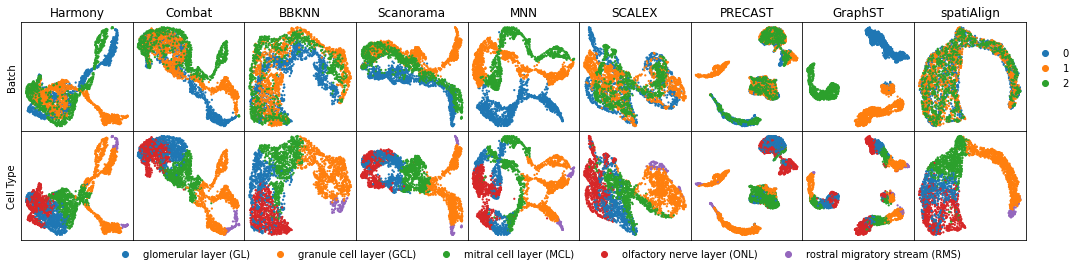

In [88]:
fig, ax = plt.subplots(2, 9, figsize=(18,4))

for key, i in zip(mapping_names.keys(), ax[0].flatten()):
    adata = data[key]
    
    sc.pl.umap(adata, color="batch", ax=i, show=False, s=20, title=mapping_names[key])
    if key == "harmony":
        i.set_ylabel("Batch")
    else:
        i.set_ylabel("")
    i.set_xlabel("")
    i.get_legend().remove()
    if key == "spatialign":
        i.legend(ncols=1, bbox_to_anchor=(1, 0.85), frameon=False)
    
    
for key, i in zip(mapping_names.keys(), ax[1].flatten()):
    adata = data[key]
    
    sc.pl.umap(adata, color="celltype", ax=i, show=False, s=20, title="")
    if key == "harmony":
        i.set_ylabel("Cell Type")
    else:
        i.set_ylabel("")
    i.set_xlabel("")
    
    i.get_legend().remove()
    
    if key == "spatialign":
        i.legend(ncols=5, bbox_to_anchor=(0.5, 0), frameon=False)
    
fig.subplots_adjust(wspace=0, hspace=0)   
plt.savefig("redraw_ob_umap.png", dpi=300, bbox_inches="tight")